In [17]:
import pandas as pd
import wandb
from tqdm import tqdm

api = wandb.Api()
entity, project = "st7ma784", "Bertscore"
runs = api.runs(entity + "/" + project)
metric_to_Grab=["F1"]
Group_by=[#"modelname",
"modelname",
"LSAVersion",
#"perfect_match",
#"padding_length"
]
ignore_values=["albert-base-v2","roberta-base"]
data={}
options={k:set() for k in Group_by}
print("Grabbing data:")
run_configs=set()
for run in tqdm(runs):
       
    if run.state == "finished" or run.summary.get("e_F1",-1)>0: #other check for all logging complete 
        hist=run.history()
        # print(hist)
        config=run.config
        #print(config)        
        sortedkeys=list([str(i) for i in config.keys()])
        sortedkeys.sort()
        items=list([str(config[i]) for i in sortedkeys])
        code="_".join(items)
        if not any([item in ignore_values for item in config.items()]) and config["batch_size"]==180 and code not in run_configs:
            run_configs.add(code)

            dictkeys=list(set(config.keys()).intersection(set(Group_by)))
            dictkeys.sort()
            for k in dictkeys:
                s=options[k]
                s.add(config.get(k,""))
                options[k]=s
            entry_name= "_".join([config.get(k,"") for k in dictkeys])
            #print(entry_name)

            dictkeys=set(hist.keys()).intersection(set(metric_to_Grab))
            for k in dictkeys:
                lis=data.get(entry_name,[])
                lis.extend(hist[k])
                data[entry_name]=lis
    
    
        # for k in dictkeys:
        #     summarydict[k].append(hist[k])



Grabbing data:


100%|██████████| 131/131 [00:56<00:00,  2.33it/s]


In [65]:
options

{'modelname': {'albert-base-v2',
  'bert-base-uncased',
  'distilbert-base-uncased',
  'facebook/bart-base',
  'roberta-base',
  'xlm-roberta-base'},
 'LSAVersion': {'my function',
  'none',
  'recursive fn',
  'recursive fn2 ',
  'recursive fn5',
  'stock'}}

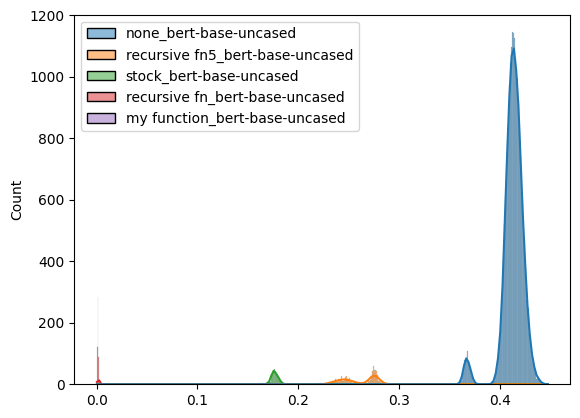

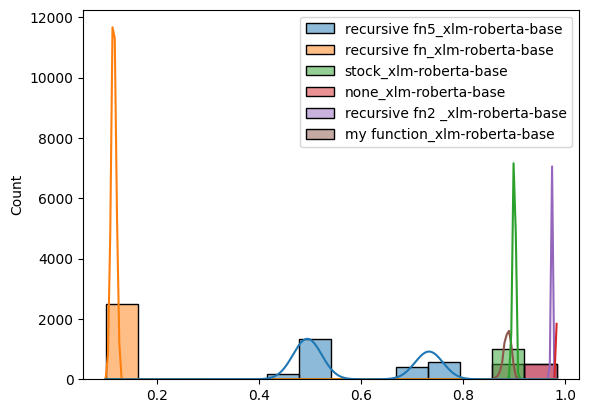

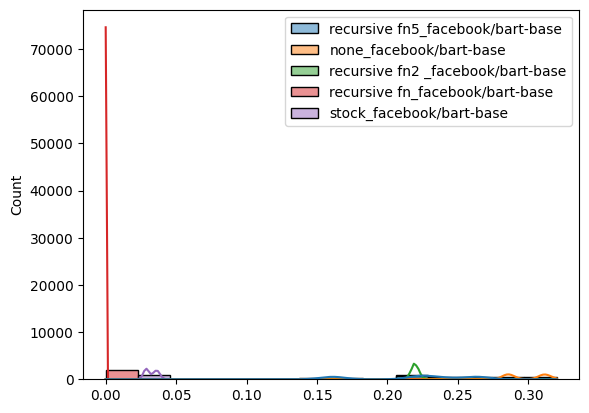

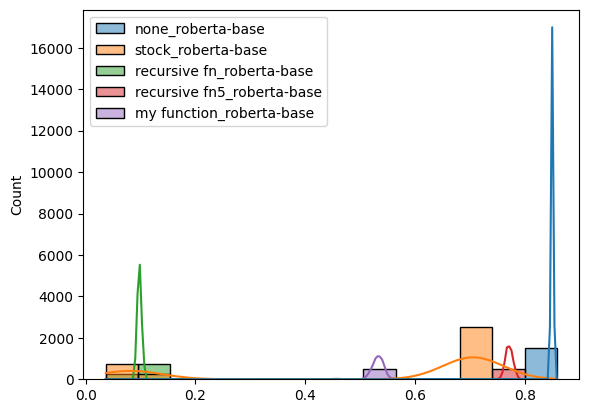

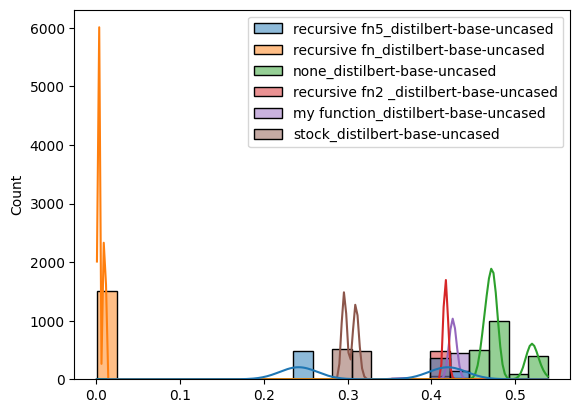

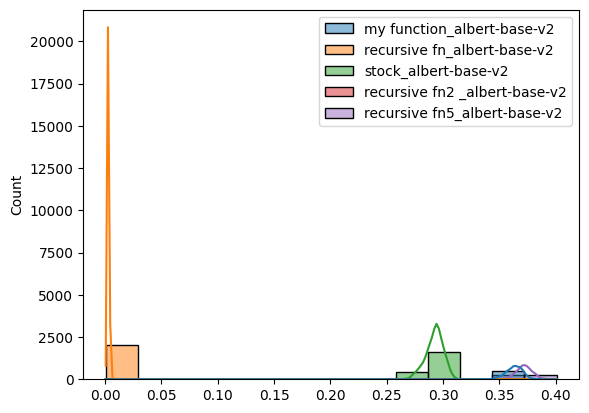

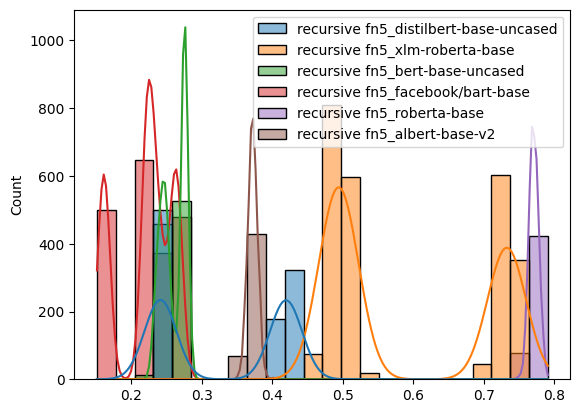

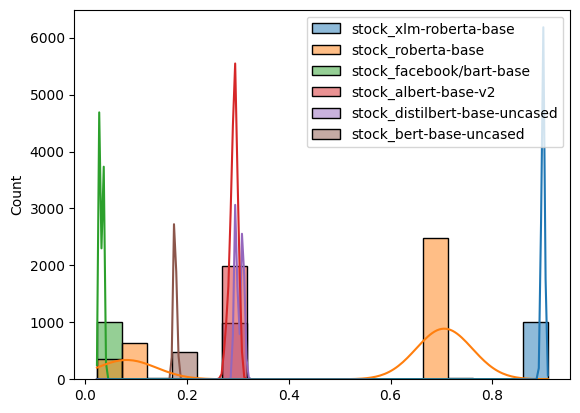

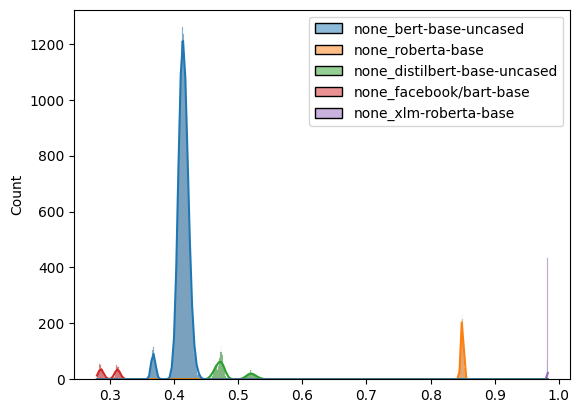

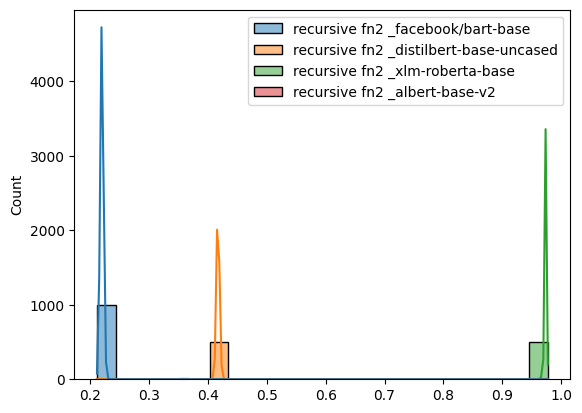

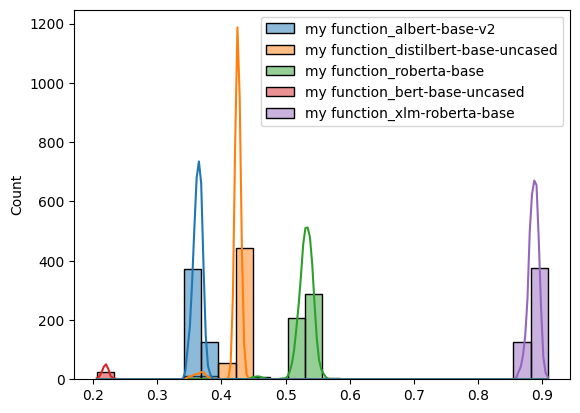

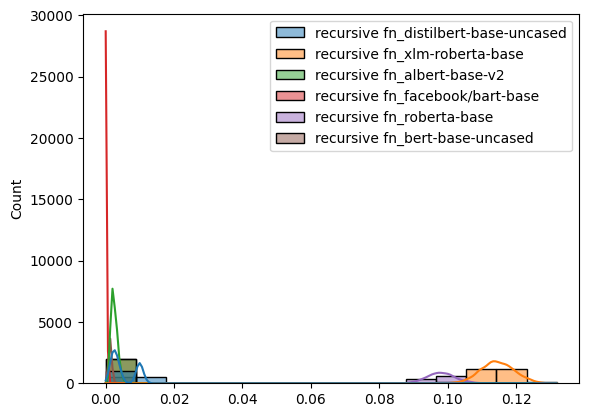

In [66]:
import seaborn as sns
# %matplotlib_inline
import matplotlib.pyplot as plt

figure=plt.figure()
i=0
for key in options:
    for entry in options[key]:
        #filter data by data.key() includes entry
        newdict={k:v for k,v in data.items() if entry in k.split("_")}
        figure=plt.figure(i)
        i+=1
        plot=sns.histplot(data=newdict, kde = True,)
        

In [27]:
#proof of concept. 

#We're going to take all runs, and then do a set of configs,

#During creation of the set, if there is the same config with 384 and 128 for padding length, we're going to plot a histogram of each set of results. 
import pandas as pd
import wandb
from tqdm import tqdm
from itertools import chain

api = wandb.Api()
entity, project = "st7ma784", "Bertscore"
runs = api.runs(entity + "/" + project)
metric_to_Grab=["F1"]
ignore_values=["albert-base-v2","roberta-base"]
data={}
print("Grabbing data:")
codepairs=[]
run_configs=set()
for run in tqdm(runs):
    if run.state == "finished" or run.summary.get("e_F1",-1)>0: #other check for all logging complete 
        config=run.config
        sortedkeys=list([str(i) for i in config.keys()])
        sortedkeys.sort()
        values=list([str(config[i]) for i in sortedkeys])
        code="_".join(values)
        if not any([item in ignore_values for item in config.values()]) and config["batch_size"]==180:
            run_configs.add(code)
for code in run_configs:
    othercode=code
    if "128" in code:
        othercode=code.replace("128","384")
    elif "384" in code:
        othercode=code.replace("384","128")
    if othercode in run_configs:
        codepairs.append((code,othercode))

tests={}
print("saving runs where tests exist")
for run in tqdm(runs):
    if run.state == "finished" or run.summary.get("e_F1",-1)>0: #other check for all logging complete 
        config=run.config

        sortedkeys=list([str(i) for i in config.keys()])
        sortedkeys.sort()
        print(sortedkeys)
        values=list([str(config[i]) for i in sortedkeys])
        code="_".join(values)

        if code in chain.from_iterable(codepairs):
            newcode=code.replace("128","")
            newcode=newcode.replace("384","")
            hist=run.history()
            
            dictkeys=set(hist.keys()).intersection(set(metric_to_Grab))
            for k in dictkeys:
                lis=tests.get(newcode,{})
                code="Padding Length = {}".format(128 if "128" in code else 384)
                lis[code]=hist[k]
                tests[newcode]=lis


Grabbing data:


100%|██████████| 131/131 [00:00<00:00, 293.88it/s]


saving runs where tests exist


  0%|          | 0/131 [00:00<?, ?it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


  5%|▌         | 7/131 [00:00<00:06, 17.79it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


  7%|▋         | 9/131 [00:00<00:10, 11.13it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


  8%|▊         | 11/131 [00:01<00:15,  7.65it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 11%|█         | 14/131 [00:01<00:13,  8.75it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 14%|█▎        | 18/131 [00:01<00:13,  8.51it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 15%|█▌        | 20/131 [00:02<00:15,  7.34it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 16%|█▌        | 21/131 [00:02<00:18,  5.83it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 17%|█▋        | 22/131 [00:03<00:24,  4.54it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 18%|█▊        | 23/131 [00:03<00:29,  3.64it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 19%|█▉        | 25/131 [00:04<00:26,  3.93it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 20%|█▉        | 26/131 [00:04<00:28,  3.67it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 21%|██        | 27/131 [00:04<00:30,  3.38it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 23%|██▎       | 30/131 [00:05<00:23,  4.33it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 24%|██▎       | 31/131 [00:05<00:27,  3.66it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 24%|██▍       | 32/131 [00:06<00:28,  3.45it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 25%|██▌       | 33/131 [00:06<00:30,  3.21it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 26%|██▌       | 34/131 [00:06<00:32,  2.97it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 27%|██▋       | 35/131 [00:07<00:35,  2.71it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 27%|██▋       | 36/131 [00:07<00:38,  2.47it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 29%|██▉       | 38/131 [00:08<00:34,  2.70it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 30%|██▉       | 39/131 [00:08<00:35,  2.57it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 31%|███▏      | 41/131 [00:09<00:27,  3.21it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 32%|███▏      | 42/131 [00:09<00:33,  2.69it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 33%|███▎      | 43/131 [00:10<00:36,  2.44it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 34%|███▎      | 44/131 [00:10<00:37,  2.33it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 35%|███▌      | 46/131 [00:11<00:30,  2.80it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 37%|███▋      | 48/131 [00:11<00:24,  3.39it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 40%|████      | 53/131 [00:12<00:13,  5.78it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 44%|████▎     | 57/131 [00:12<00:10,  7.11it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 44%|████▍     | 58/131 [00:13<00:12,  5.96it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 45%|████▌     | 59/131 [00:13<00:15,  4.54it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 46%|████▌     | 60/131 [00:13<00:18,  3.82it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 47%|████▋     | 62/131 [00:14<00:17,  4.04it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 48%|████▊     | 63/131 [00:14<00:20,  3.37it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 49%|████▉     | 64/131 [00:15<00:22,  3.04it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 50%|████▉     | 65/131 [00:15<00:23,  2.84it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 50%|█████     | 66/131 [00:16<00:23,  2.77it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 52%|█████▏    | 68/131 [00:16<00:19,  3.28it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 55%|█████▍    | 72/131 [00:17<00:11,  5.16it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 56%|█████▋    | 74/131 [00:17<00:11,  4.78it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 60%|█████▉    | 78/131 [00:17<00:08,  6.20it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 61%|██████    | 80/131 [00:18<00:08,  5.82it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 62%|██████▏   | 81/131 [00:18<00:10,  4.93it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 63%|██████▎   | 83/131 [00:19<00:10,  4.63it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 66%|██████▌   | 86/131 [00:19<00:09,  4.97it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 66%|██████▋   | 87/131 [00:20<00:10,  4.14it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 67%|██████▋   | 88/131 [00:20<00:11,  3.78it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 69%|██████▉   | 91/131 [00:21<00:09,  4.39it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 71%|███████   | 93/131 [00:21<00:08,  4.36it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 72%|███████▏  | 94/131 [00:22<00:10,  3.58it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 73%|███████▎  | 96/131 [00:22<00:08,  3.96it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 78%|███████▊  | 102/131 [00:22<00:04,  6.85it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 79%|███████▊  | 103/131 [00:23<00:05,  5.43it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 79%|███████▉  | 104/131 [00:23<00:06,  4.11it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'generate_trials', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'optimize_parallel', 'optimize_parallel_cpu', 'optimize_parallel_gpu', 'optimize_trials_parallel_gpu', 'padding_length', 'perfect_match', 'trials']


 80%|████████  | 105/131 [00:24<00:07,  3.60it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 84%|████████▍ | 110/131 [00:24<00:03,  5.58it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 85%|████████▍ | 111/131 [00:25<00:04,  4.46it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 89%|████████▊ | 116/131 [00:25<00:02,  6.55it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 89%|████████▉ | 117/131 [00:26<00:02,  5.39it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 90%|█████████ | 118/131 [00:26<00:02,  4.62it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 92%|█████████▏| 120/131 [00:27<00:02,  4.73it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 92%|█████████▏| 121/131 [00:27<00:02,  4.15it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 95%|█████████▍| 124/131 [00:27<00:01,  4.82it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 95%|█████████▌| 125/131 [00:28<00:01,  3.97it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 96%|█████████▌| 126/131 [00:28<00:01,  3.37it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']
['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 98%|█████████▊| 128/131 [00:29<00:00,  3.74it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


 98%|█████████▊| 129/131 [00:29<00:00,  3.22it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'padding_length', 'perfect_match']


100%|██████████| 131/131 [00:30<00:00,  4.33it/s]

['LSAVersion', 'accelerator', 'all_layers', 'batch_size', 'dir', 'hpc_exp_number', 'log_path', 'modelname', 'num_trials', 'perfect_match']


  9%|▊         | 4/47 [00:00<00:01, 37.34it/s]

recursive fn5_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_bert-base-uncased_-1__True
none_auto_False_180_/data_test_tube.argparse_hopt.HyperOptArgumentParser.generate_trials_None_/nobackup/projects/bdlan05/$USER/logs/_bert-base-uncased_0_test_tube.argparse_hopt.HyperOptArgumentParser.optimize_parallel_test_tube.argparse_hopt.HyperOptArgumentParser.optimize_parallel_cpu_test_tube.argparse_hopt.HyperOptArgumentParser.optimize_parallel_gpu_test_tube.argparse_hopt.HyperOptArgumentParser.optimize_trials_parallel_gpu__False_test_tube.argparse_hopt.HyperOptArgumentParser.opt_trials
none_auto_False_180_/data_test_tube.argparse_hopt.HyperOptArgumentParser.generate_trials_None_/nobackup/projects/bdlan05/$USER/logs/_bert-base-uncased_0_test_tube.argparse_hopt.HyperOptArgumentParser.optimize_parallel_test_tube.argparse_hopt.HyperOptArgumentParser.optimize_parallel_cpu_test_tube.argparse_hopt.HyperOptArgumentParser.optimize_parallel_gpu_test_tube.argparse_hopt.HyperOptArgumentP

 38%|███▊      | 18/47 [00:00<00:00, 60.44it/s]

none_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_bert-base-uncased_-1__True
recursive fn5_auto_False_180_/datasets3_None_/nobackup/projects/bdlan05/$USER/logs/_xlm-roberta-base_-1__False
recursive fn_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_distilbert-base-uncased_-1__False
recursive fn_auto_False_180_/datasets2_None_/nobackup/projects/bdlan05/$USER/logs/_xlm-roberta-base_-1__True
my function_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_xlm-roberta-base_-1__True
my function_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_distilbert-base-uncased_-1__True
recursive fn5_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_bert-base-uncased_-1__False
none_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_distilbert-base-uncased_-1__True
none_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_distilbert-base-uncased_-1__True
recursive fn5_auto_False_180_/datasets3_None_

100%|██████████| 47/47 [00:00<00:00, 75.36it/s]

none_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_distilbert-base-uncased_-1__False
recursive fn5_auto_False_180_/datasets2_None_/nobackup/projects/bdlan05/$USER/logs/_xlm-roberta-base_-1__True
stock_auto_False_180_/datasets2_None_/nobackup/projects/bdlan05/$USER/logs/_facebook/bart-base_-1__False
none_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_xlm-roberta-base_-1__True
none_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_xlm-roberta-base_-1__True
stock_auto_False_180_/datasets2_None_/nobackup/projects/bdlan05/$USER/logs/_distilbert-base-uncased_-1__False
stock_auto_False_180_/datasets3_None_/nobackup/projects/bdlan05/$USER/logs/_bert-base-uncased_-1__False
recursive fn_auto_False_180_/datasets2_None_/nobackup/projects/bdlan05/$USER/logs/_xlm-roberta-base_-1__False
recursive fn5_auto_False_180_/data_None_/nobackup/projects/bdlan05/$USER/logs/_facebook/bart-base_-1__False
recursive fn2 _auto_False_180_/data_None_/nobackup/projec

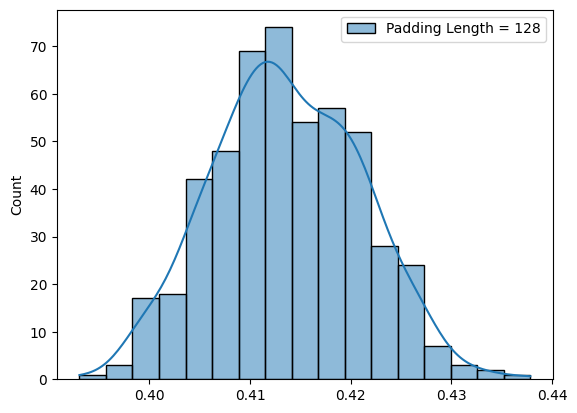

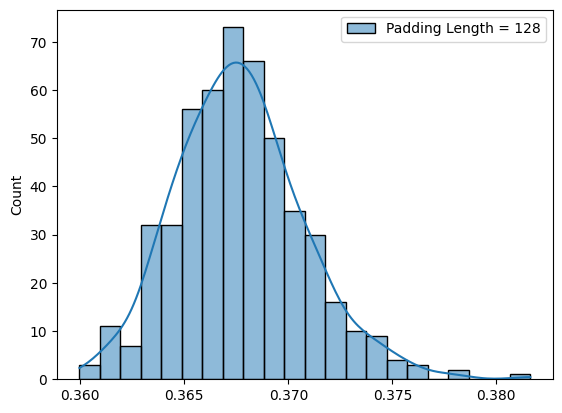

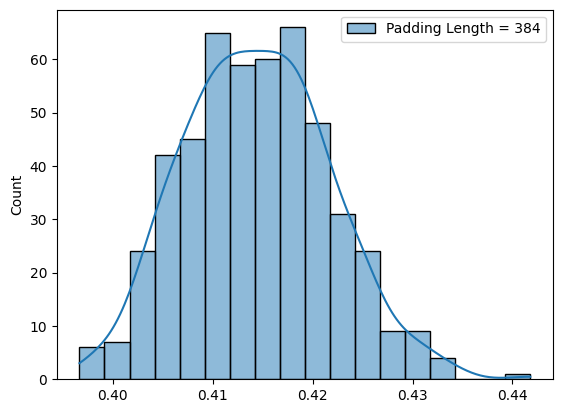

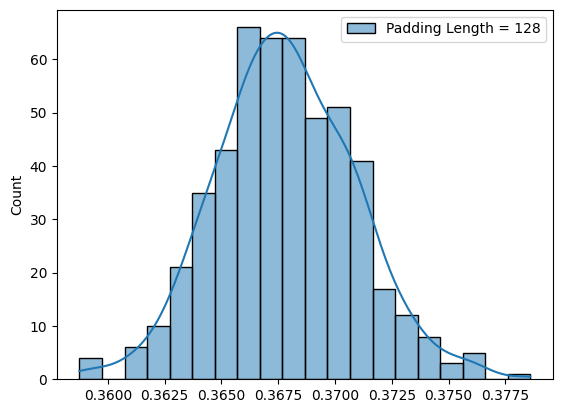

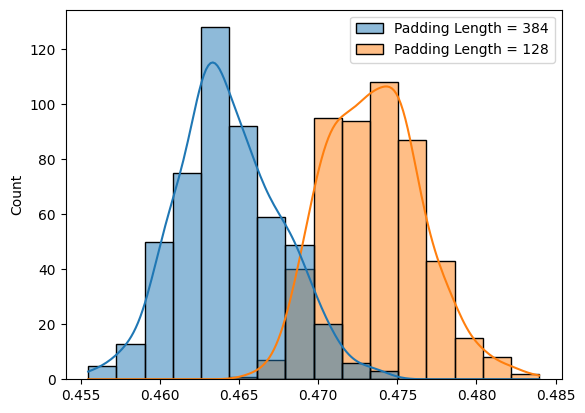

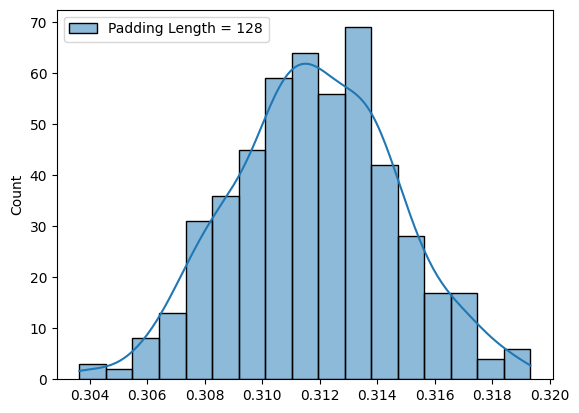

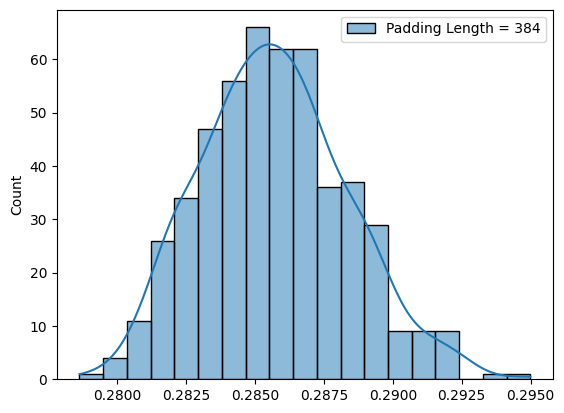

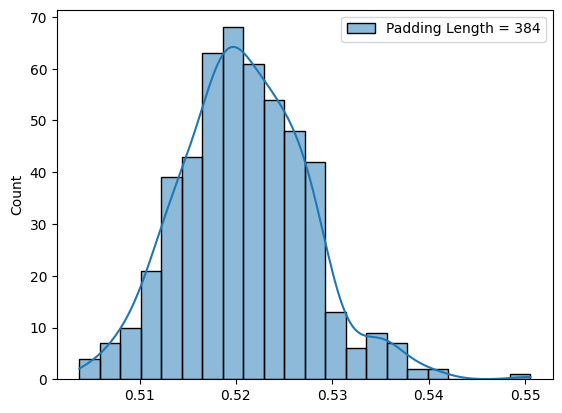

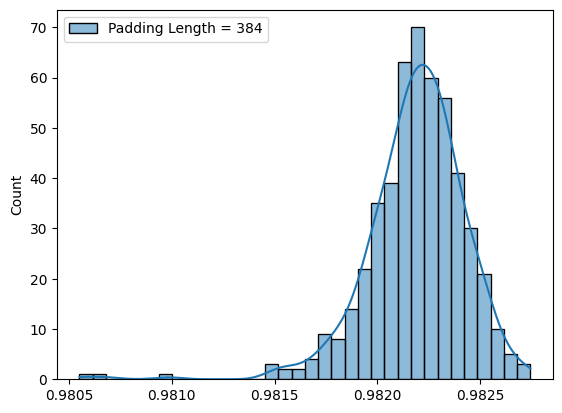

In [28]:
import seaborn as sns
# %matplotlib_inline
import matplotlib.pyplot as plt
from tqdm import tqdm
figure=plt.figure()
i=0
for key in tqdm(tests):
    print(key)
    if key.startswith("none"):
        figure=plt.figure(i)
        i+=1
        plot=sns.histplot(data=tests[key], kde = True,)
        print(key)